In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

C:\Users\15783\AppData\Local\Temp\ipykernel_8640\606206881.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


[Employee dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset) is to predict whether an employee will leave the company based on their attributes

In [3]:
raw_df=pandas.read_csv("Employee.csv")

display(raw_df)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


Other than sex, the dataset also has following protected attributes:
- Age (Age)

In [4]:
print(f"The dataset contains {raw_df.shape[0]} entries")
print(f"Number of duplicate entries: {raw_df.duplicated().sum()}")

df=raw_df.drop_duplicates()

print(f"The dataset contains {df.shape[0]} unique entries")
print(f"This datasets has {df.shape[1]-1} features")

The dataset contains 4653 entries
Number of duplicate entries: 1889
The dataset contains 2764 unique entries
This datasets has 8 features


In [5]:
label_column="LeaveOrNot"

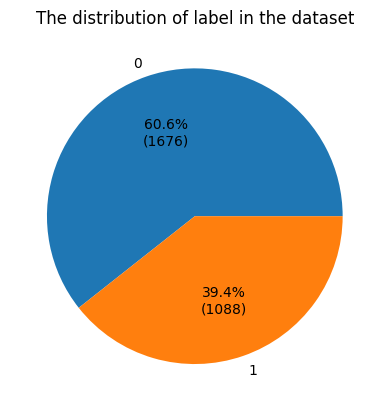

In [6]:
label_count = df[label_column].value_counts()

def autolabel(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(label_count,labels=label_count.index, autopct=lambda pct: autolabel(pct, label_count))
plt.title("The distribution of label in the dataset")
plt.show()

The label distribution of dataset slightly skew towards negative

The label distribution is balanced for this dataset

In [7]:
sex_column="Gender"
privilleged_group="Male"

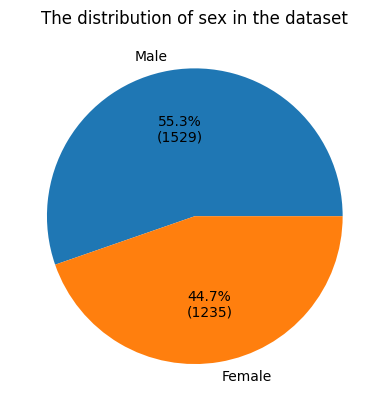

In [9]:
sex_count = df[sex_column].value_counts()

plt.pie(sex_count,labels=sex_count.index, autopct=lambda pct: autolabel(pct, sex_count))
plt.title("The distribution of sex in the dataset")
plt.show()

The distribution of protected attributes of the dataset is relatively balanced

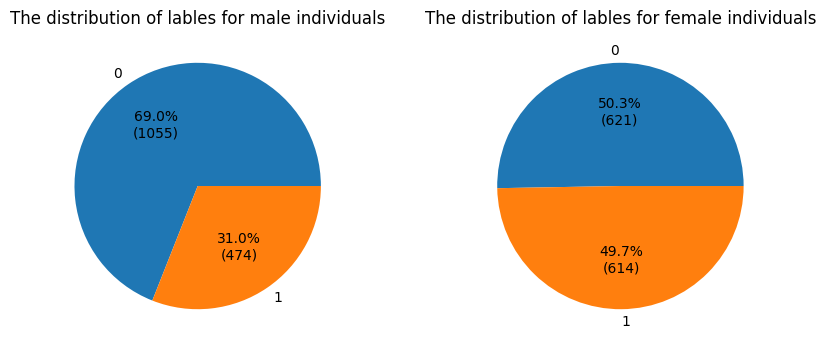

In [10]:
man_df=df.loc[df[sex_column]==privilleged_group].loc[:,[sex_column,label_column]]
woman_df=df.loc[df[sex_column]!=privilleged_group].loc[:,[sex_column,label_column]]

male_label_count=man_df[label_column].value_counts()
female_label_count=woman_df[label_column].value_counts()

fig, ax=plt.subplots(1,2,figsize=(10, 4))
ax[0].pie(male_label_count,labels=male_label_count.index, autopct=lambda pct: autolabel(pct, male_label_count))
ax[0].set_title("The distribution of lables for male individuals")
ax[1].pie(female_label_count,labels=female_label_count.index, autopct=lambda pct: autolabel(pct, female_label_count))
ax[1].set_title("The distribution of lables for female individuals")
plt.show()

The label distributions of privilleged groups skew more towards negative compared to protected groups as well as overall distribution